In [ ]:
# In this script we want to solve the system of odes for assembling two 3-membered rings  
# with synthesis and degradation NOT included 
# Name: Leo Lagunes and Paige M.
# Date: 07/14/21 

# Last update: 03/27/22

# IMPORTANT NOTE: The equations were written and developed by Drs. Eric Deeds and Koan Briggs, this code was developed by LL + PM

# Running in python because Julia hasn't really been working just yet


In [1]:
# ---------------------------------------------------
# --- packages to use ---
# ---------------------------------------------------

# First we need to import all of the packages we will be using!\n",
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math
from scipy.integrate import solve_ivp

In [2]:
# ---------------------------------------------------
# --- example form EJD ---
# ---------------------------------------------------

# First model: no synthesis and degradation
# This is the definition of our system of ODEs for the model
def first_model(states,t): 
    # Our \"states\" list has the state variables in the following order:",
    # S, KS, Sstar, PSstar, K, P\n",
    S = states[0]
    KS = states[1]
    Sstar = states[2]
    PSstar = states[3]
    P = states[5]
    K = states[4]
    # The above just makes it easier to relate our ODEs to the ones in the Homework text
    S_prime = -k_plus*S*K + k_minus*KS + k_cat*PSstar
    KS_prime = k_plus*S*K - k_minus*KS - k_cat*KS
    Sstar_prime = -k_plus*Sstar*P + k_minus*PSstar + k_cat*KS
    PSstar_prime = k_plus*Sstar*P - k_minus*PSstar - k_cat*PSstar
    K_prime = -k_plus*S*K + k_minus*KS + k_cat*KS
    P_prime = -k_plus*Sstar*P + k_minus*PSstar + k_cat*PSstar
    states_prime = [S_prime,KS_prime,Sstar_prime,PSstar_prime,K_prime,P_prime]
    
    return states_prime

def michMenten(states, t):
    # the MM model as a second example
    # Our \"states\" list has the state variables in the following order:",
    # S, E, ES, P, kon, koff, kcat 
    S = states[0]
    E = states[1]
    ES = states[2]
    P = states[3]
    
    #kOn = states[4]
    #kOff = states[5]
    #kCat = states[6]
    # list of odes
    S_prime = -kOn*E*S + kOff*ES
    E_prime = -kOn*E*S + (kOff+kCat)*ES
    ES_prime = kOn*E*S - (kOff + kCat)*ES
    P_prime = kCat*ES
    
    states_prime = [S_prime, E_prime, ES_prime, P_prime]
    
    return states_prime
    
# --- Keff function ---
def keff(i,j):
    # calculate the k_effective value given the i,j indices and the kd's (binding affinities)
    ℯ = math.e
    #kd1 = kds[0]; kd2 = kds[1]
    keff= kOn*(kd1**i)*(kd2**j)*ℯ**(-(i+j-1)*9/0.6)
    
    return keff

# --- EJD Eqns for stacked trimer ---   
def stackedTrimer(states, t):
    #x0Val = paramvaluesList[0] # initial condition for x1 
    x = states
    # keff(i,j)= kOn*(kd1)^i*(kd2)^j*ℯ^(-(i+j-1)*9/0.6)
    # list of odes
    dx_0 = - 2*kOn*0.5*x[0]*x[0] + 1*keff(1,0)*x[1] - 2*kOn*0.5*x[0]*x[0] + 1*keff(1,0)*x[1] - 1*kOn*0.5*x[0]*x[0] + 1*keff(0,1)*x[2] - 1*kOn*0.5*x[0]*x[0] + 1*keff(0,1)*x[2] - 1*kOn*1*x[0]*x[1] + 3*keff(2,0)*x[3] - 1*kOn*1*x[0]*x[1] + 1*keff(0,1)*x[4] - 1*kOn*1*x[0]*x[1] + 1*keff(0,1)*x[5] - 2*kOn*1*x[0]*x[2] + 1*keff(1,0)*x[5] - 2*kOn*1*x[0]*x[2] + 1*keff(1,0)*x[4] - 3*kOn*1*x[0]*x[3] + 1*keff(0,1)*x[6] - 1*kOn*1*x[0]*x[4] + 1*keff(2,0)*x[6] - 1*kOn*1*x[0]*x[4] + 2*keff(1,0)*x[7] - 1*kOn*1*x[0]*x[4] + 2*keff(1,1)*x[8] - 1*kOn*1*x[0]*x[5] + 1*keff(2,0)*x[6] - 1*kOn*1*x[0]*x[5] + 2*keff(1,1)*x[8] - 1*kOn*1*x[0]*x[5] + 2*keff(1,0)*x[9] - 2*kOn*1*x[0]*x[6] + 2*keff(1,1)*x[10] - 2*kOn*1*x[0]*x[7] + 1*keff(2,1)*x[10] - 2*kOn*1*x[0]*x[8] + 1*keff(2,0)*x[10] - 2*kOn*1*x[0]*x[9] + 1*keff(2,1)*x[10] - 1*kOn*1*x[0]*x[10] + 6*keff(2,1)*x[11]     
    dx_1 = + 2*kOn*0.5*x[0]*x[0] - 1*keff(1,0)*x[1] - 1*kOn*1*x[0]*x[1] + 3*keff(2,0)*x[3] - 1*kOn*1*x[0]*x[1] + 1*keff(0,1)*x[4] - 1*kOn*1*x[0]*x[1] + 1*keff(0,1)*x[5] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,2)*x[8] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,2)*x[8] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,1)*x[9] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,1)*x[9] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,1)*x[7] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,1)*x[7] - 2*kOn*1*x[1]*x[2] + 1*keff(2,0)*x[6] - 3*kOn*1*x[1]*x[3] + 1*keff(0,2)*x[10] - 1*kOn*1*x[1]*x[4] + 1*keff(2,1)*x[10] - 1*kOn*1*x[1]*x[5] + 1*keff(2,1)*x[10] - 1*kOn*1*x[1]*x[6] + 6*keff(2,2)*x[11]
    dx_2 = + 1*kOn*0.5*x[0]*x[0] - 1*keff(0,1)*x[2] - 2*kOn*1*x[0]*x[2] + 1*keff(1,0)*x[5] - 2*kOn*1*x[0]*x[2] + 1*keff(1,0)*x[4] - 2*kOn*1*x[1]*x[2] + 1*keff(2,0)*x[6] - 4*kOn*0.5*x[2]*x[2] + 1*keff(2,0)*x[8] - 4*kOn*0.5*x[2]*x[2] + 1*keff(2,0)*x[8] - 2*kOn*1*x[2]*x[4] + 1*keff(3,0)*x[10] - 2*kOn*1*x[2]*x[5] + 1*keff(3,0)*x[10] - 2*kOn*1*x[2]*x[8] + 3*keff(4,0)*x[11]      
    dx_3 = + 1*kOn*1*x[0]*x[1] - 3*keff(2,0)*x[3] - 3*kOn*1*x[0]*x[3] + 1*keff(0,1)*x[6] - 3*kOn*1*x[1]*x[3] + 1*keff(0,2)*x[10] - 3*kOn*0.5*x[3]*x[3] + 1*keff(0,3)*x[11] - 3*kOn*0.5*x[3]*x[3] + 1*keff(0,3)*x[11]      
    dx_4 = + 1*kOn*1*x[0]*x[1] - 1*keff(0,1)*x[4] + 2*kOn*1*x[0]*x[2] - 1*keff(1,0)*x[4] - 1*kOn*1*x[0]*x[4] + 1*keff(2,0)*x[6] - 1*kOn*1*x[0]*x[4] + 2*keff(1,0)*x[7] - 1*kOn*1*x[0]*x[4] + 2*keff(1,1)*x[8] - 1*kOn*1*x[1]*x[4] + 1*keff(2,1)*x[10] - 2*kOn*1*x[2]*x[4] + 1*keff(3,0)*x[10] - 1*kOn*0.5*x[4]*x[4] + 3*keff(4,1)*x[11] - 1*kOn*0.5*x[4]*x[4] + 3*keff(4,1)*x[11]      
    dx_5 = + 1*kOn*1*x[0]*x[1] - 1*keff(0,1)*x[5] + 2*kOn*1*x[0]*x[2] - 1*keff(1,0)*x[5] - 1*kOn*1*x[0]*x[5] + 1*keff(2,0)*x[6] - 1*kOn*1*x[0]*x[5] + 2*keff(1,1)*x[8] - 1*kOn*1*x[0]*x[5] + 2*keff(1,0)*x[9] - 1*kOn*1*x[1]*x[5] + 1*keff(2,1)*x[10] - 2*kOn*1*x[2]*x[5] + 1*keff(3,0)*x[10] - 1*kOn*0.5*x[5]*x[5] + 3*keff(4,1)*x[11] - 1*kOn*0.5*x[5]*x[5] + 3*keff(4,1)*x[11]         
    dx_6 = + 3*kOn*1*x[0]*x[3] - 1*keff(0,1)*x[6] + 1*kOn*1*x[0]*x[4] - 1*keff(2,0)*x[6] + 1*kOn*1*x[0]*x[5] - 1*keff(2,0)*x[6] - 2*kOn*1*x[0]*x[6] + 2*keff(1,1)*x[10] + 2*kOn*1*x[1]*x[2] - 1*keff(2,0)*x[6] - 1*kOn*1*x[1]*x[6] + 6*keff(2,2)*x[11]      
    dx_7 = + 1*kOn*1*x[0]*x[4] - 2*keff(1,0)*x[7] - 2*kOn*1*x[0]*x[7] + 1*keff(2,1)*x[10] + 1*kOn*0.5*x[1]*x[1] - 1*keff(0,1)*x[7]  
    dx_8 = + 1*kOn*1*x[0]*x[4] - 2*keff(1,1)*x[8] + 1*kOn*1*x[0]*x[5] - 2*keff(1,1)*x[8] - 2*kOn*1*x[0]*x[8] + 1*keff(2,0)*x[10] + 1*kOn*0.5*x[1]*x[1] - 1*keff(0,2)*x[8] + 4*kOn*0.5*x[2]*x[2] - 1*keff(2,0)*x[8] - 2*kOn*1*x[2]*x[8] + 3*keff(4,0)*x[11]      
    dx_9 = + 1*kOn*1*x[0]*x[5] - 2*keff(1,0)*x[9] - 2*kOn*1*x[0]*x[9] + 1*keff(2,1)*x[10] + 1*kOn*0.5*x[1]*x[1] - 1*keff(0,1)*x[9]  
    dx_10 = + 2*kOn*1*x[0]*x[6] - 2*keff(1,1)*x[10] + 2*kOn*1*x[0]*x[7] - 1*keff(2,1)*x[10] + 2*kOn*1*x[0]*x[8] - 1*keff(2,0)*x[10] + 2*kOn*1*x[0]*x[9] - 1*keff(2,1)*x[10] - 1*kOn*1*x[0]*x[10] + 6*keff(2,1)*x[11] + 3*kOn*1*x[1]*x[3] - 1*keff(0,2)*x[10] + 1*kOn*1*x[1]*x[4] - 1*keff(2,1)*x[10] + 1*kOn*1*x[1]*x[5] - 1*keff(2,1)*x[10] + 2*kOn*1*x[2]*x[4] - 1*keff(3,0)*x[10] + 2*kOn*1*x[2]*x[5] - 1*keff(3,0)*x[10]    
    dx_11 = 1*kOn*1*x[0]*x[10] - 6*keff(2,1)*x[11] + 1*kOn*1*x[1]*x[6] - 6*keff(2,2)*x[11] + 2*kOn*1*x[2]*x[8] - 3*keff(4,0)*x[11] + 3*kOn*0.5*x[3]*x[3] - 1*keff(0,3)*x[11] + 1*kOn*0.5*x[4]*x[4] - 3*keff(4,1)*x[11] + 1*kOn*0.5*x[5]*x[5] - 3*keff(4,1)*x[11]
       
    states_prime = [dx_0, dx_1,dx_2,dx_3,dx_4, dx_5, dx_6,dx_7,dx_8,dx_9,dx_10,dx_11]
    
    return states_prime    

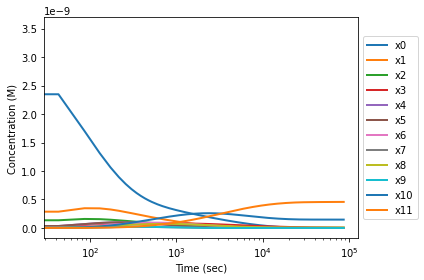

In [11]:
# ---------------------------------------------------
# --- Stacked trimer time course ---
# ---------------------------------------------------

# --- PARAMETERS ---
# List of fixed parameters
kOn = 10**6
δ = 0 # degradation rate parameter
Q = 0 # synthesis rate parameter


# List of parameters that will be explored 
IC_1 = 3.52*10**-9;
kd1 = 10**-9 # binding affinity WITHIN rings (intra)
kd2 = 10**-9 # binding affinity BETWEEN rings (inter)

states_0 = [IC_1,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0]
# parametersList= [kOn,δ,Q, kd1,kd2]

# To intgrate ODEs, we need a vector for time
# Note that the units on t are in seconds
tEnd = 86400 # 24hrs
t = np.linspace(0,tEnd,2000)
# Now, integrate the ODEs and put the results in \"solution\"
solution = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)
    
plt.semilogx(t,solution,'-',linewidth=2)

plt.xlabel('Time (sec)')
plt.ylabel('Concentration (M)')
plt.legend(('x0','x1', 'x2','x3', 'x4','x5', 'x6','x7', 'x8','x9', 'x10','x11'),loc='center left', bbox_to_anchor=(1, 0.5))
#plt.show()  

# 
plt.tight_layout()
plt.savefig('LL_SR_python_tols_m12_0324.png')
    
    
    
    
    

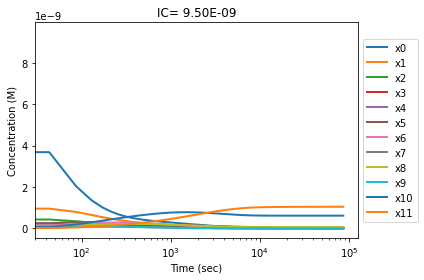

In [98]:
# ---------------------------------------------------
# --- Stacked trimer time course ---
# ---------------------------------------------------

# different solvers 

# --- PARAMETERS ---
# List of fixed parameters
kOn = 10**6
δ = 0 # degradation rate parameter
Q = 0 # synthesis rate parameter


# List of parameters that will be explored 
IC_1 = 9.5*10**-9;
kd1 = 10**-9 # binding affinity WITHIN rings (intra)
kd2 = 10**-9 # binding affinity BETWEEN rings (inter)

states_0 = [IC_1,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0]
# parametersList= [kOn,δ,Q, kd1,kd2]

# To intgrate ODEs, we need a vector for time
# Note that the units on t are in seconds
tEnd = 86400 # 24hrs
t = np.linspace(0,tEnd,2000)
# Now, integrate the ODEs and put the results in \"solution\"
solution = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)

ICFormat = format(IC_1,'.2E')

plt.semilogx(t,solution,'-',linewidth=2)
plt.title('IC= '+ ICFormat)
plt.xlabel('Time (sec)')
plt.ylabel('Concentration (M)')
plt.legend(('x0','x1', 'x2','x3', 'x4','x5', 'x6','x7', 'x8','x9', 'x10','x11'),loc='center left', bbox_to_anchor=(1, 0.5))
#plt.show()  

# 
plt.tight_layout()
#plt.savefig('LL_SR_python_odeInt_tols_m10_IC_9.5E-9_0324.png')
    

0.6569925509592609


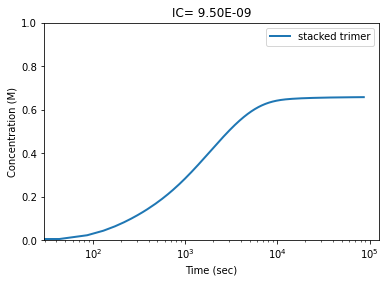

In [99]:
# ---------------------------------------------------
# --- Assembly Yield ---
# ---------------------------------------------------

# Calculate the assembly yield for each time course of the 12th species

tVec = t;
xStkTrm_tps = solution[:,-1] # the fully stacked trimer

n=6; Xn = xStkTrm_tps;
# --- calculate XT --- 
# define XT as the IC of monomers (predefined - compare them-maybe Xn)
XT = IC_1; # print(XT)
# --- calculate Yn ---
Yn = n*Xn/XT;

print(max(Yn))

# --- plot AY values --- 
plt.semilogx(t,Yn,'-',linewidth=2)
x1,x2,y1,y2 = plt.axis(); plt.axis((x1,x2,0,1))


plt.title('IC= '+ ICFormat)
plt.xlabel('Time (sec)')
plt.ylabel('Concentration (M)')
plt.legend(["stacked trimer"],loc='best')
#plt.show()  

#plt.tight_layout()
#plt.savefig('LL_SR_AY_odeInt_tols_m10_IC_4.58E-7_0324.png')

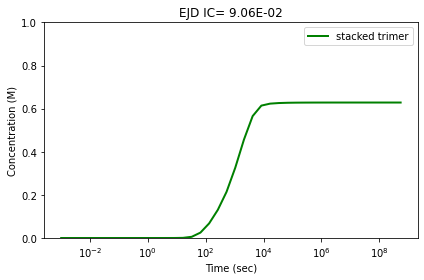

In [12]:
# ---------------------------------------------------
# --- EJD comparison ---
# ---------------------------------------------------

# compare EJD solutions to python slns 

# --- load EJD matrix --- 

trial1=np.loadtxt('results_1.35e-8.dat', delimiter = '\t') # this is the matrix 
# data in the following form: 
# columns are the species assembly yield (12 species)
# the rows correspond to that time point which are all listed in column 1

tVec_EJD = trial1[:,0];
xStkTrm_EJD = trial1[:,-1] # the fully stacked trimer

IC_1=1.35**-8
ICFormat = format(IC_1,'.2E')

# --- plot EJD AY for X11 --- 
plt.semilogx(tVec_EJD,xStkTrm_EJD,'g-',linewidth=2)
x1,x2,y1,y2 = plt.axis(); plt.axis((x1,x2,0,1))


plt.title('EJD IC= '+ ICFormat)
plt.xlabel('Time (sec)')
plt.ylabel('Concentration (M)')
plt.legend(["stacked trimer"],loc='best')
#plt.show()  

plt.tight_layout()
plt.savefig('EJD_SR_AY_IC_1.35E-8_0327.png')



In [ ]:
# ---------------------------------------------------
# --- EJD comparison ---
# ---------------------------------------------------

# compare EJD solutions to python slns by passing in the time vector to the odeint solver
# then taking the difference in the AY values and plotting the difference/errors

















